 ## Univariable Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv("Uni_linear.txt", header=None)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       97 non-null     float64
 1   1       97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [4]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0.5, 1.0, 'Profit Prediction')

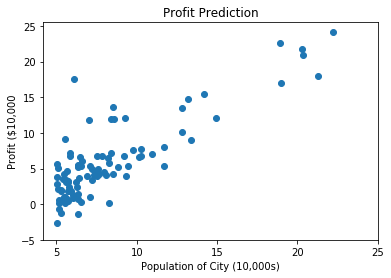

In [6]:
plt.scatter(data[0],data[1])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit Prediction")

In [7]:
def computeCost(X,y,theta):
    m = len(y) # len(x)
    #print(theta.shape)
    #print(X.shape)
    predictions= X.dot(theta)  
    #print(predictions)
    square_err=(predictions - y)**2
    return 1/(2*m) * np.sum(square_err)
    

In [8]:
data_n=data.values
m=data_n[:,0].size
y=data_n[:,1].reshape(m,1)
X=np.append(  np.ones((m,1))  ,  data_n[:,0].reshape(m,1),  axis=1  )
theta=np.zeros((2,1))



computeCost(X,y,theta)

32.072733877455676

In [9]:
def gradientDescent(X,y,theta,alpha,num_iters):
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
        
    return theta, J_history
        

In [10]:
theta,J_history = gradientDescent(X,y,theta,0.01,1500)
#print(J_history)
print( "h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

h(x) =-3.63 + 1.17x1


In [11]:
n_iterations = [x for x in range(0,1500)]

Text(0.5, 1.0, 'Cost function using Gradient Descent')

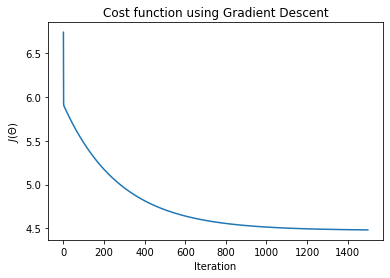

In [12]:
plt.plot(n_iterations,J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Text(0.5, 1.0, 'Profit Prediction')

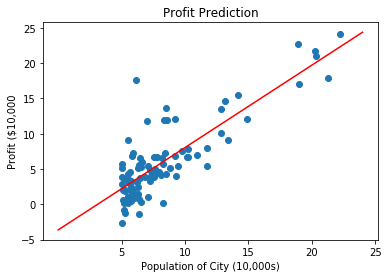

In [13]:
plt.scatter(data[0],data[1])
x_value=[x for x in range(25)]
y_value=[y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="r")
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit Prediction")

In [14]:
#x_value

In [15]:
#y_value

In [16]:
def predict(x,theta):
    predictions= np.dot(theta.transpose(),x)
    print(predictions)
    return predictions[0]   # for round offf

In [17]:
predict1=predict(np.array([1,3.5]),theta)*10000
print("For population = 35,000, we predict a profit of $"+str(round(predict1,0)))

[0.45197679]
For population = 35,000, we predict a profit of $4520.0


# Multivariable Linear Regression

In [18]:
data2=pd.read_csv("Multi_linear.txt", header=None)

In [19]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       47 non-null     int64
 1   1       47 non-null     int64
 2   2       47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [20]:
data2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [21]:
data2.describe()

,0,1,2
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


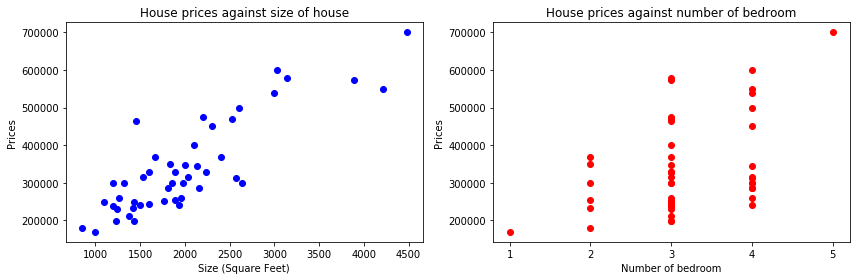

In [22]:
fig, axes = plt.subplots(figsize=(12,4),nrows=1,ncols=2)


axes[0].scatter(data2[0],data2[2],color="b")
axes[0].set_xlabel("Size (Square Feet)")
axes[0].set_ylabel("Prices")
axes[0].set_title("House prices against size of house")


axes[1].scatter(data2[1],data2[2],color="r")
axes[1].set_xlabel("Number of bedroom")
axes[1].set_ylabel("Prices")
axes[1].set_xticks(np.arange(1,6,step=1))
axes[1].set_title("House prices against number of bedroom")

plt.tight_layout()

In [23]:
def featureNormalization(X):
    #print(X)
    mean=np.mean(X,axis=0)
    #print(mean)
    std=np.std(X,axis=0)
    #print(std)
    X_norm = (X - mean)/std
    return X_norm , mean , std

In [24]:
data_n2=data2.values
m2=len(data_n2[:,-1])
X2=data_n2[:,0:2].reshape(m2,2)
X2, mean_X2, std_X2 = featureNormalization(X2)
X2 = np.append( np.ones((m2,1)) ,X2, axis=1)
y2=data_n2[:,-1].reshape(m2,1)
theta2=np.zeros((3,1))

In [25]:
computeCost(X2,y2,theta2)   #same function

65591548106.45744

In [26]:
theta2, J_history2 = gradientDescent(X2,y2,theta2,0.1,400)
print("h(x) ="+str(round(theta2[0,0],2))+" + "+str(round(theta2[1,0],2))+"x1 + "+str(round(theta2[2,0],2))+"x2")

h(x) =340412.66 + 109447.8x1 + -6578.35x2


Text(0.5, 1.0, 'Cost function using Gradient Descent')

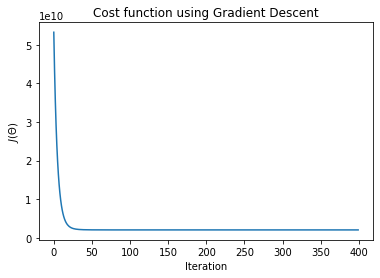

In [27]:
plt.plot(J_history2)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [28]:
x_sample = featureNormalization(np.array([1650,3]))[0]
x_sample=np.append(np.ones(1),x_sample)
predict3=predict(x_sample,theta2)
print("For size of house = 1650, Number of bedroom = 3, we predict a house value of $"+str(round(predict3,0)))

[456438.80913176]
For size of house = 1650, Number of bedroom = 3, we predict a house value of $456439.0
